# TODO
- upratat ten hnusny kod + EDA v nb
- wandb logging sweep
- ModernBERT https://huggingface.co/tasksource/ModernBERT-base-nli
<hr>
GENERAL: https://huggingface.co/datasets/alespalla/chatbot_instruction_prompts 

LAW: https://huggingface.co/datasets/dim/law_stackexchange_prompts 

FINANCE: https://huggingface.co/datasets/Marina-C/question-answer-Subject-Finance-Instruct 

HEALTHCARE: https://huggingface.co/datasets/iecjsu/lavita-ChatDoctor-HealthCareMagic-100k 

In [ ]:
from llm_classifier import LMTrainer, LMClassifier
from svm_tfidf import SVMClassifier
from fasttext_model import *
from utilities import *
import os
import dotenv
import fasttext
from fastembed import TextEmbedding
from tqdm import tqdm
import re
import nltk
from datasets import load_dataset

nltk.download('stopwords', download_dir=os.path.join(os.path.dirname('../.venv/'), 'nltk_data'))
nltk.download('punkt_tab', download_dir=os.path.join(os.path.dirname('../.venv/'), 'nltk_data'))
nltk.download('wordnet', download_dir=os.path.join(os.path.dirname('../.venv/'), 'nltk_data'))

dotenv.load_dotenv()

[nltk_data] Downloading package stopwords to ../.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to ../.venv\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to ../.venv\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
finQA = load_dataset("LLukas22/fiqa")
medQA = load_dataset("medalpaca/medical_meadow_medical_flashcards")

open_path = "../data/open_domain_data.csv"
specific_path = "../data/specific_domain_data.csv"

train_size = 10_000
test_size = 10_000
val_size = 2000

In [3]:
open_data = pd.read_csv(open_path)
specific_data = pd.read_csv(specific_path)

open_data = open_data
specific_data = specific_data

merged_data = pd.concat([open_data, specific_data])

shuffled_data = merged_data.sample(frac=1).reset_index(drop=True)

shuffled_data['question'] = (
    shuffled_data['question']
    .apply(lambda x: re.sub(r'[^\w\s]', '', x.encode('utf-8').decode('utf-8').lower()))
)

train_data = shuffled_data[:train_size]
val_data = shuffled_data[train_size:train_size + val_size]
test_data = shuffled_data[train_size:train_size + test_size]

# Models

In [4]:
# Example usage
available_models = get_models()
if available_models:
    print("Available models:", available_models)
else:
    print("Failed to retrieve models")

Available models: ['gpt-4o', 'llama3.1:70b', 'llama3.1:8b', 'o1-mini', 'o1-preview', 'gpt-4', 'gpt-4o-mini', 'gpt-4-turbo']


# Embedding Models

In [5]:
baai_embedding = TextEmbedding(model_name="BAAI/bge-small-en-v1.5")
jina_embedding = TextEmbedding(model_name="jinaai/jina-embeddings-v2-small-en")
miniLM_embedding = TextEmbedding(model_name="sentence-transformers/all-MiniLM-L6-v2")

Fetching 5 files: 100%|██████████| 5/5 [00:00<?, ?it/s]


# GPT-4o-mini

In [6]:
api_key = os.getenv("OPENAI_API_KEY")
proxy_url = os.getenv("PROXY_URL")

gpt_model = LMClassifier(api_key=api_key, proxy_url=proxy_url, domain='law', model_name='gpt-4o-mini', train_size=500, test_size=1000)
gpt_model.load_data(train_data=train_data, test_data=test_data)

trainer = LMTrainer(gpt_model.train_data)

Train data: 500
Test data: 1000


Going to sample between 1 and 8 traces per predictor.
Will attempt to bootstrap 4 candidate sets.


Average Metric: 472 / 500  (94.4): 100%|██████████| 500/500 [01:12<00:00,  6.92it/s]


New best score: 94.4 for seed -3
Scores so far: [94.4]
Best score so far: 94.4


Average Metric: 491 / 500  (98.2): 100%|██████████| 500/500 [01:14<00:00,  6.74it/s]


New best score: 98.2 for seed -2
Scores so far: [94.4, 98.2]
Best score so far: 98.2


  2%|▏         | 8/500 [00:00<00:00, 1328.78it/s]


Bootstrapped 8 full traces after 9 examples in round 0.


Average Metric: 487 / 500  (97.4): 100%|██████████| 500/500 [01:19<00:00,  6.30it/s]


Scores so far: [94.4, 98.2, 97.4]
Best score so far: 98.2


  1%|▏         | 7/500 [00:12<15:13,  1.85s/it]  


Bootstrapped 7 full traces after 8 examples in round 0.


Average Metric: 485 / 500  (97.0): 100%|██████████| 500/500 [01:20<00:00,  6.21it/s]


Scores so far: [94.4, 98.2, 97.4, 97.0]
Best score so far: 98.2


  1%|          | 3/500 [00:02<06:48,  1.22it/s]


Bootstrapped 3 full traces after 4 examples in round 0.


Average Metric: 490 / 500  (98.0): 100%|██████████| 500/500 [01:32<00:00,  5.39it/s]


Scores so far: [94.4, 98.2, 97.4, 97.0, 98.0]
Best score so far: 98.2


  0%|          | 1/500 [00:00<07:22,  1.13it/s]


Bootstrapped 1 full traces after 2 examples in round 0.


Average Metric: 488 / 500  (97.6): 100%|██████████| 500/500 [01:10<00:00,  7.14it/s]


Scores so far: [94.4, 98.2, 97.4, 97.0, 98.0, 97.6]
Best score so far: 98.2


  1%|          | 4/500 [00:02<06:04,  1.36it/s]


Bootstrapped 4 full traces after 5 examples in round 0.


Average Metric: 487 / 500  (97.4): 100%|██████████| 500/500 [01:09<00:00,  7.24it/s]


Scores so far: [94.4, 98.2, 97.4, 97.0, 98.0, 97.6, 97.4]
Best score so far: 98.2
7 candidate programs found.


100%|██████████| 1000/1000 [14:17<00:00,  1.17it/s]


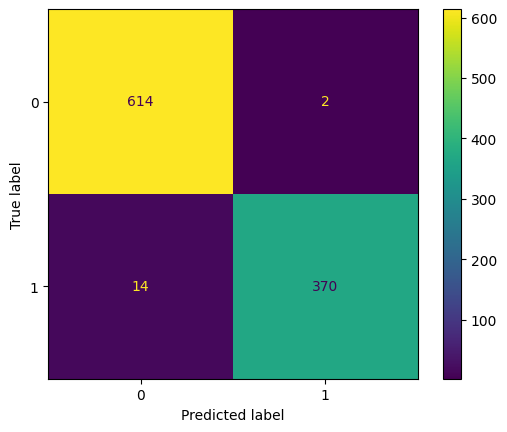

Total cost is: 0.00245835$
F1 score: 0.98
Accuracy: 0.98
Recall: 0.96
Precision: 0.99
[('prog', Predict(ClassificationSignature(domain, prompt -> label
    instructions='Classify if a text is specific for a domain or not.'
    domain = Field(annotation=str required=True json_schema_extra={'desc': 'The target domain to classify the prompt against.', '__dspy_field_type': 'input', 'prefix': 'Domain:'})
    prompt = Field(annotation=str required=True json_schema_extra={'desc': 'The prompt to classify.', '__dspy_field_type': 'input', 'prefix': 'Prompt:'})
    label = Field(annotation=str required=True json_schema_extra={'desc': '1, if the input text belong to domain, 0 otherwise.', '__dspy_field_type': 'output', 'prefix': 'Label:'})
)))]
Model saved to ../models/gpt-4o-mini.json


In [7]:
predictions = []
true_labels = []
total_cost = 0

compiled_model = trainer.optimize_model()

for example in tqdm(gpt_model.test_data):
    prediction = trainer.optimized_model(prompt=example.prompt, domain=example.domain).label
    predictions.append(prediction)
    true_labels.append(example.label)
    total_cost += calculate_prompt_cost(example.prompt+example.domain, completion=prediction, model_name=gpt_model.model_name)

f1, accuracy, recall, precision = trainer.evaluate(predictions, true_labels)

print(f"Total cost is: {total_cost:.8f}$")
print(f"F1 score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

trainer.save_model(f"../models/{gpt_model.model_name}.json")

# SVM-TFIDF

In [ ]:
train_data = preprocess_data(train_data)

config = {
    'C': 0.05,
    'embedding_model': baai_embedding,
}

svm_classifier = SVMClassifier(config=config)

X_train, X_test, y_train, y_test = train_data['question'], test_data['question'], train_data['label'], test_data['label']

X_train = list(config.get('embedding_model').embed(X_train))
X_test = list(config.get('embedding_model').embed(X_test))

c:\Users\riso\Desktop\Prompt-Classification\src\utilities.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['question'] = data['question'].apply(clean_text)


Training complete


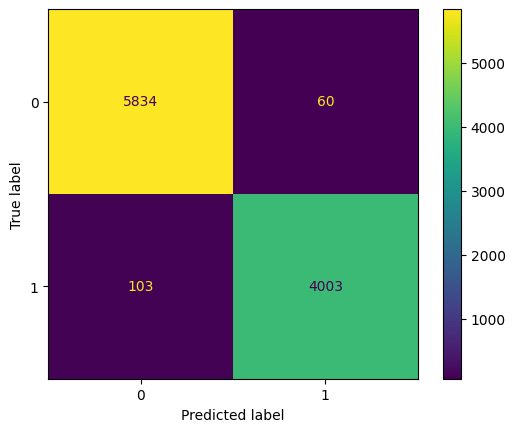

Overfitting check:
F1 score: 0.98
Accuracy: 0.98
Recall: 0.97
Precision: 0.99


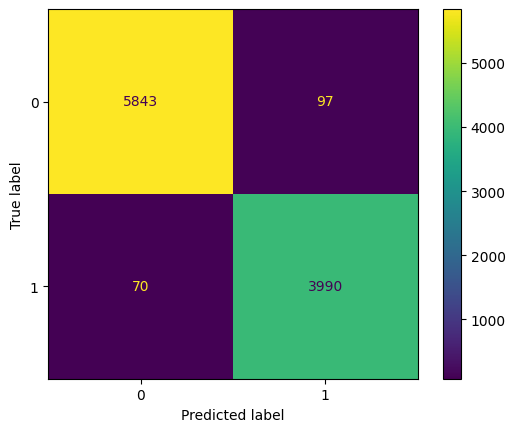

Final results:
F1 score: 0.98
Accuracy: 0.98
Recall: 0.98
Precision: 0.98


In [9]:
svm_classifier.train(X_train, y_train)
print("Training complete")

f1, accuracy, recall, precision = svm_classifier.evaluate(X_train, y_train)
print("Overfitting check:")
print(f"F1 score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

f1, accuracy, recall, precision = svm_classifier.evaluate(X_test, y_test)
print("Final results:")
print(f"F1 score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

In [10]:
svm_classifier.predict("If lepernauchs were recognized as healthcare providers, would their actions be covered under malpractice insurance laws?")

array([1], dtype=int64)

In [11]:
# Save the model
svm_classifier.save_model(model_path=f'../models/{svm_classifier.model_name}.joblib')

Model saved to ../models/SVM_TFIDF.joblib


# FastText

In [12]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

In [13]:
fasttext_model = FastText(train_data=train_data, test_data=test_data, val_data=val_data)

train_file = "../data/fasttext_train.txt"
test_file = "../data/fasttext_test.txt"
val_file = "../data/fasttext_val.txt"

fasttext_model.preprocess_data(train_path=train_file, test_path=test_file, val_path=val_file)

In [14]:
ft_model = fasttext.train_supervised(input=train_file, lr=0.8e-3, epoch=100, autotuneValidationFile=val_file)

print("Check overfitting:")
print_results(*ft_model.test(train_file))
print()
print("Final results:")
print_results(*ft_model.test(test_file))

Check overfitting:
N	10000
P@1	0.976
R@1	0.976

Final results:
N	10000
P@1	0.946
R@1	0.946


In [15]:
ft_model.predict("If lepernauchs were recognized as healthcare providers, would their actions be covered under malpractice insurance laws?", k=2)

(('__label__1', '__label__0'), array([0.87017655, 0.12984346]))

In [16]:
ft_model.save_model(f"../models/{fasttext_model.model_name}.bin")

In [1]:
from datasets import load_dataset

ds = load_dataset("LLukas22/fiqa")

c:\Users\riso\Desktop\Prompt-Classification\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 2561/2561 [00:00<00:00, 232855.25 examples/s]


In [5]:
train_data = ds['train']['question']

'What do brokers do with bad stock?'